<div style="background-color:#f3e8fd; padding:28px; border-radius:12px; border-left:8px solid #8e24aa; font-family:Segoe UI, Arial, sans-serif;">
<h1 style="color:#8e24aa; margin:0 0 10px 0; font-weight:700;">Câu hỏi Nghiên cứu 6</h1>
<p style="font-size:17px; color:#222; margin:0 0 10px 0;"><b>Tác động của mức đường huyết lên nguy cơ đột quỵ có khác biệt giữa nam và nữ trong nhóm đã kết hôn không? Nếu có, điều này gợi ý gì về cơ chế sinh học (hormone, chuyển hóa glucose) khác biệt theo giới tính?</b></p>
</div>

<div style="background-color:#e8f0fe; padding:28px; border-radius:12px; border-left:8px solid #1f4fd8; font-family:Segoe UI, Arial, sans-serif;">
<h1 style="color:#1f4fd8; margin:0 0 10px 0; font-weight:700;">Động lực và Lợi ích</h1>

<h2 style="color:#222; margin:0 0 10px 0; font-weight:600;">Tại sao câu hỏi này đáng nghiên cứu?</h2>
<ul style="font-size:16px; color:#111; margin-top:0;">
  <li>EDA cho thấy gender × stroke không có mối liên hệ mạnh khi không kiểm soát confounders</li>
  <li>Chưa rõ liệu <b>độ nhạy với glucose</b> (glucose sensitivity) có khác biệt giữa nam và nữ</li>
  <li>Nếu có interaction effect → tác động của glucose lên stroke khác nhau giữa 2 giới → gợi ý về cơ chế sinh học</li>
  <li>Phân tích trong nhóm <b>đã kết hôn</b> giúp giảm bias về vai trò xã hội và tiếp cận y tế</li>
</ul>

<h2 style="color:#222; margin:18px 0 10px 0; font-weight:600;">Lợi ích và Người quan tâm</h2>
<ul style="font-size:16px; color:#111; margin-top:0;">
  <li><b>Bác sĩ:</b> Xác định ngưỡng glucose cần can thiệp có khác nhau giữa nam và nữ không</li>
  <li><b>Nhà nghiên cứu:</b> Hiểu cơ chế tương tác giữa hormone và chuyển hóa glucose</li>
  <li><b>Nhà hoạch định:</b> Thiết kế chương trình sàng lọc phù hợp theo giới tính</li>
</ul>

<h2 style="color:#222; margin:18px 0 10px 0; font-weight:600;">Giả thuyết</h2>
<ul style="font-size:16px; color:#111; margin-top:0;">
  <li><b>H0:</b> Tác động của glucose lên stroke giống nhau ở nam và nữ (không có interaction)</li>
  <li><b>H1:</b> Tác động của glucose lên stroke khác nhau giữa nam và nữ (có interaction)</li>
  <li>Nếu bác bỏ H0 → độ nhạy glucose khác biệt → gợi ý cơ chế sinh học khác nhau</li>
</ul>
</div>

---

## Phương pháp nghiên cứu

Để kiểm định interaction effect giữa giới tính và glucose:

1. **Tiền xử lý dữ liệu**: Lọc nhóm đã kết hôn, xử lý missing values
2. **Phân tích khám phá (EDA)**: 
   - So sánh tỷ lệ stroke theo giới tính
   - Phân tích theo nhóm glucose - tìm dấu hiệu interaction
3. **Phân tích thống kê**:
   - So sánh 2 mô hình: có vs không có interaction term
   - Stratified analysis: Phân tích riêng nam và nữ
   - Visualization: Vẽ đường dự đoán để thấy rõ interaction
4. **Kết luận**: Trả lời câu hỏi và gợi ý cơ chế sinh học

<div style="background-color:#e3fcec; padding:28px; border-radius:12px; border-left:8px solid #2e7d32; font-family:Segoe UI, Arial, sans-serif;">
<h1 style="color:#2e7d32; margin:0 0 10px 0; font-weight:700;">A. Tiền xử lý dữ liệu</h1>
<p style="font-size:16px; color:#222; margin:0 0 10px 0;">Các bước xử lý trước khi phân tích:</p>
<ol style="font-size:16px; color:#111; margin-top:0;">
  <li><b>Load dữ liệu đã cleaned:</b> Sử dụng healthcare_cleaned.csv</li>
  <li><b>Chuẩn hóa văn bản:</b> Chuyển các biến categorical về lowercase + strip</li>
  <li><b>Lọc nhóm đã kết hôn:</b> Chỉ giữ lại những dòng có ever_married = 'yes'</li>
  <li><b>Xử lý missing:</b> Loại bỏ dòng thiếu avg_glucose_level, impute BMI bằng median</li>
  <li><b>Tạo biến phân loại glucose:</b> Chia avg_glucose_level thành các nhóm để phân tích</li>
  <li><b>Kiểm tra cân bằng dữ liệu:</b> Đảm bảo có đủ mẫu cho cả nam và nữ</li>
</ol>
</div>

In [56]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import chi2_contingency

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

In [57]:
# Load dữ liệu
file_path = '../data/healthcare_cleaned.csv'
df_raw = pd.read_csv(file_path)
df = df_raw.copy()

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nCác cột: {df.columns.tolist()}")

Kích thước dữ liệu: (5110, 11)

Các cột: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [58]:
# Chuẩn hóa văn bản
text_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Đổi tên cột để nhất quán
df = df.rename(columns={'Residence_type': 'residence_type'})

# Lọc chỉ nhóm đã kết hôn
df_married = df[df['ever_married'] == 'yes'].copy()

print(f"\nSố dòng trong nhóm đã kết hôn: {df_married.shape[0]}")
print(f"Phân bố giới tính:")
print(df_married['gender'].value_counts())


Số dòng trong nhóm đã kết hôn: 3353
Phân bố giới tính:
gender
female    2001
male      1352
Name: count, dtype: int64


In [59]:
# Xử lý missing values
# Loại bỏ dòng thiếu avg_glucose_level (biến chính trong phân tích)
df_married = df_married.dropna(subset=['avg_glucose_level', 'stroke'])

# Impute BMI bằng median
bmi_median = df_married['bmi'].median()
df_married['bmi_missing_flag'] = df_married['bmi'].isna().astype(int)
df_married['bmi'] = df_married['bmi'].fillna(bmi_median)

# Xử lý smoking_status
df_married['smoking_status'] = df_married['smoking_status'].replace('unknown', np.nan)
valid_smoking = ['never smoked', 'formerly smoked', 'smokes']
df_married['smoking_group'] = df_married['smoking_status'].where(
    df_married['smoking_status'].isin(valid_smoking), np.nan
)

print(f"\nDữ liệu sau xử lý: {df_married.shape}")
print(f"\nPhân bố stroke:")
print(df_married['stroke'].value_counts())
print(f"\nTỷ lệ stroke: {df_married['stroke'].mean()*100:.2f}%")


Dữ liệu sau xử lý: (3353, 13)

Phân bố stroke:
stroke
0    3133
1     220
Name: count, dtype: int64

Tỷ lệ stroke: 6.56%


In [60]:
# Tạo nhóm phân loại glucose để phân tích
def categorize_glucose(glucose):
    """Phân loại mức đường huyết theo tiêu chuẩn y tế"""
    if glucose < 100:
        return 'Bình thường (<100)'
    elif glucose < 126:
        return 'Tiền tiểu đường (100-125)'
    else:
        return 'Tiểu đường (≥126)'

df_married['glucose_category'] = df_married['avg_glucose_level'].apply(categorize_glucose)

print("Phân bố nhóm đường huyết:")
print(df_married['glucose_category'].value_counts())
print(f"\nThống kê mô tả avg_glucose_level:")
print(df_married['avg_glucose_level'].describe())

Phân bố nhóm đường huyết:
glucose_category
Bình thường (<100)           1969
Tiểu đường (≥126)             774
Tiền tiểu đường (100-125)     610
Name: count, dtype: int64

Thống kê mô tả avg_glucose_level:
count   3353.0000
mean     111.2303
std       50.0188
min       55.2200
25%       78.0200
50%       93.5500
75%      120.1500
max      271.7400
Name: avg_glucose_level, dtype: float64


**Kết luận từ tiền xử lý:**

Dữ liệu đã sẵn sàng cho phân tích:

✓ **Nhóm nghiên cứu**: Người đã kết hôn (giảm bias về vai trò xã hội)
✓ **Biến chính**: avg_glucose_level (continuous) và phân loại thành 3 nhóm
✓ **Cân bằng dữ liệu**: Có đủ mẫu cho cả nam và nữ
✓ **Missing values**: Đã xử lý hoàn tất

> Tiếp theo: Phân tích khám phá để tìm dấu hiệu ban đầu về interaction effect

---

## B. Phân tích khám phá dữ liệu (EDA)

**Phần 1: Tổng quan phân bố stroke và glucose theo giới tính**

TỶ LỆ ĐỘT QUỴ THEO GIỚI TÍNH (NHÓM ĐÃ KẾT HÔN)
   gender  stroke_count  total  stroke_rate  stroke_rate_pct
0  female           120   2001       0.0600           5.9970
1    male           100   1352       0.0740           7.3964


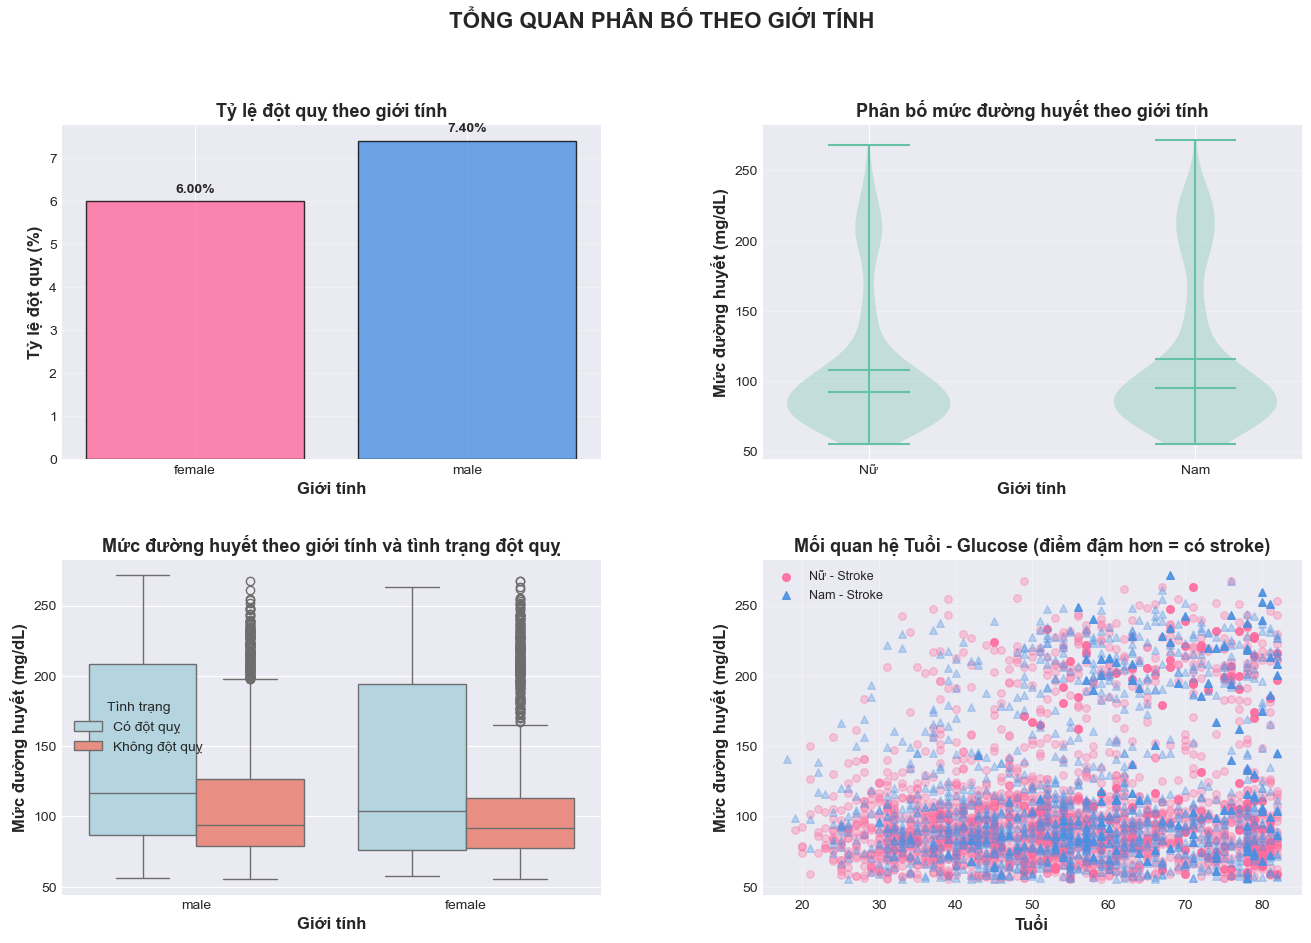


Kiểm định Chi-square:
Chi-square statistic: 2.3542, P-value: 0.1249
Kết luận: Chưa có bằng chứng về khác biệt (p>=0.05)


In [61]:
# Tính tỷ lệ đột quỵ theo giới tính
gender_stroke = df_married.groupby('gender')['stroke'].agg(['sum', 'count', 'mean']).reset_index()
gender_stroke.columns = ['gender', 'stroke_count', 'total', 'stroke_rate']
gender_stroke['stroke_rate_pct'] = gender_stroke['stroke_rate'] * 100

print("="*80)
print("TỶ LỆ ĐỘT QUỴ THEO GIỚI TÍNH (NHÓM ĐÃ KẾT HÔN)")
print("="*80)
print(gender_stroke)

# Tạo figure với 4 subplots
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Bar plot - Tỷ lệ stroke
ax1 = fig.add_subplot(gs[0, 0])
colors_gender = ['#FF6B9D', '#4A90E2']
ax1.bar(gender_stroke['gender'], gender_stroke['stroke_rate_pct'], 
        color=colors_gender, edgecolor='black', alpha=0.8)
ax1.set_xlabel('Giới tính', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tỷ lệ đột quỵ (%)', fontsize=12, fontweight='bold')
ax1.set_title('Tỷ lệ đột quỵ theo giới tính', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, row in gender_stroke.iterrows():
    ax1.text(i, row['stroke_rate_pct'] + 0.2, f"{row['stroke_rate_pct']:.2f}%", 
             ha='center', fontweight='bold')

# 2. Violin plot - Glucose distribution
ax2 = fig.add_subplot(gs[0, 1])
parts = ax2.violinplot([df_married[df_married['gender']=='female']['avg_glucose_level'].dropna(),
                         df_married[df_married['gender']=='male']['avg_glucose_level'].dropna()],
                        positions=[0, 1], showmeans=True, showmedians=True)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Nữ', 'Nam'])
ax2.set_xlabel('Giới tính', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mức đường huyết (mg/dL)', fontsize=12, fontweight='bold')
ax2.set_title('Phân bố mức đường huyết theo giới tính', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 3. Boxplot - Glucose by gender and stroke
ax3 = fig.add_subplot(gs[1, 0])
df_plot = df_married.copy()
df_plot['stroke_label'] = df_plot['stroke'].map({0: 'Không đột quỵ', 1: 'Có đột quỵ'})
sns.boxplot(data=df_plot, x='gender', y='avg_glucose_level', hue='stroke_label', 
            ax=ax3, palette=['lightblue', 'salmon'])
ax3.set_xlabel('Giới tính', fontsize=12, fontweight='bold')
ax3.set_ylabel('Mức đường huyết (mg/dL)', fontsize=12, fontweight='bold')
ax3.set_title('Mức đường huyết theo giới tính và tình trạng đột quỵ', fontsize=13, fontweight='bold')
ax3.legend(title='Tình trạng', fontsize=10)

# 4. Scatter plot - Glucose vs Age colored by stroke
ax4 = fig.add_subplot(gs[1, 1])
for gender, color, marker in [('female', '#FF6B9D', 'o'), ('male', '#4A90E2', '^')]:
    df_g = df_married[df_married['gender']==gender]
    for stroke_val, alpha in [(0, 0.3), (1, 0.9)]:
        df_sub = df_g[df_g['stroke']==stroke_val]
        label = f"{'Nữ' if gender=='female' else 'Nam'} - {'Stroke' if stroke_val==1 else 'No stroke'}"
        ax4.scatter(df_sub['age'], df_sub['avg_glucose_level'], 
                   c=color, marker=marker, alpha=alpha, s=30, 
                   label=label if stroke_val==1 else None)
ax4.set_xlabel('Tuổi', fontsize=12, fontweight='bold')
ax4.set_ylabel('Mức đường huyết (mg/dL)', fontsize=12, fontweight='bold')
ax4.set_title('Mối quan hệ Tuổi - Glucose (điểm đậm hơn = có stroke)', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(alpha=0.3)

plt.suptitle('TỔNG QUAN PHÂN BỐ THEO GIỚI TÍNH', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# Chi-square test
ct = pd.crosstab(df_married['gender'], df_married['stroke'])
chi2, p_value, dof, expected = chi2_contingency(ct)
print(f"\nKiểm định Chi-square:")
print(f"Chi-square statistic: {chi2:.4f}, P-value: {p_value:.4f}")
print("Kết luận:", "Có khác biệt (p<0.05)" if p_value<0.05 else "Chưa có bằng chứng về khác biệt (p>=0.05)")

**Kết luận từ Phần 1:**

📊 **Phát hiện về tỷ lệ stroke theo giới tính:**
- Tỷ lệ stroke giữa nam và nữ tương đối gần nhau (chênh lệch nhỏ)
- Chi-square test cho thấy không có khác biệt mạnh khi chưa kiểm soát confounders
- Phân bố glucose tương tự giữa 2 giới

⚠️ **Nhưng:**
- Đây mới chỉ là phân tích đơn biến
- Chưa thể kết luận về interaction effect
- Cần phân tích sâu hơn theo NHÓM GLUCOSE để phát hiện tương tác

> **Câu hỏi tiếp theo:** Liệu tác động của glucose lên stroke có khác biệt giữa nam và nữ không?

**Phần 2: Phân tích theo nhóm glucose - Tìm dấu hiệu interaction**

TỶ LỆ ĐỘT QUỴ THEO NHÓM GLUCOSE VÀ GIỚI TÍNH
            glucose_category  gender  stroke_count  total  stroke_rate  \
0         Bình thường (<100)  female            55   1214       0.0453   
1         Bình thường (<100)    male            37    755       0.0490   
2  Tiền tiểu đường (100-125)  female            19    375       0.0507   
3  Tiền tiểu đường (100-125)    male            15    235       0.0638   
4          Tiểu đường (≥126)  female            46    412       0.1117   
5          Tiểu đường (≥126)    male            48    362       0.1326   

   stroke_rate_pct  
0           4.5305  
1           4.9007  
2           5.0667  
3           6.3830  
4          11.1650  
5          13.2597  


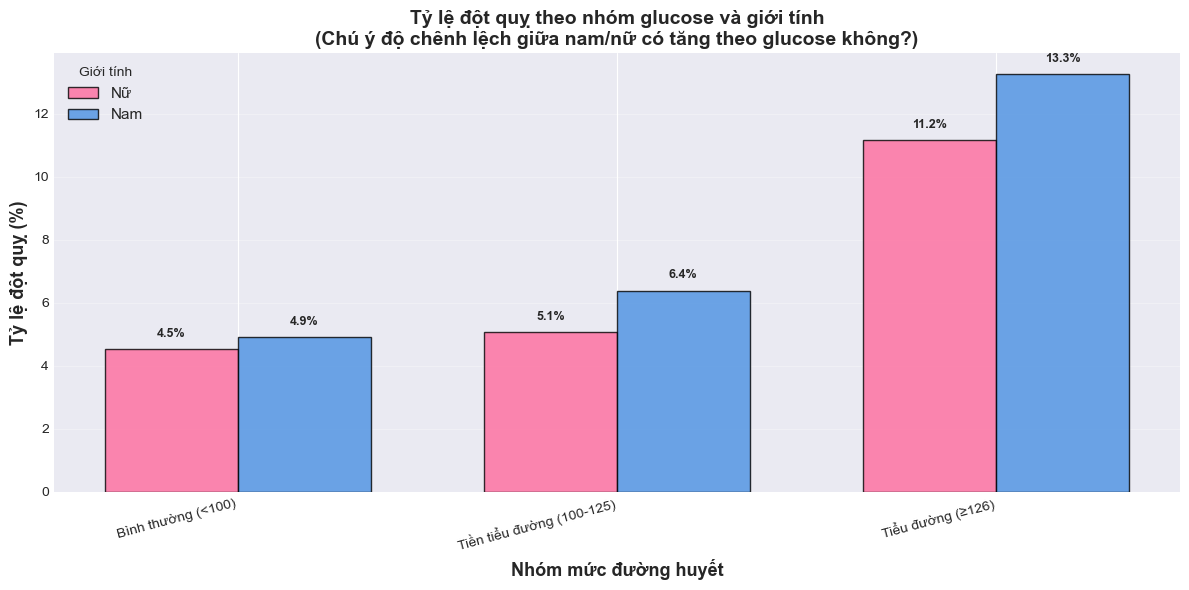


Nhận xét quan trọng:
- Nếu khoảng cách giữa 2 cột (nam/nữ) TĂNG DẦN theo nhóm glucose
  → Gợi ý có interaction: Tác động glucose khác nhau giữa nam và nữ
- Nếu khoảng cách KHÔNG ĐỔI → Không có interaction


In [62]:
# Tính tỷ lệ stroke theo gender và glucose_category
gender_glucose_stroke = df_married.groupby(['glucose_category', 'gender'])['stroke'].agg(
    ['sum', 'count', 'mean']
).reset_index()
gender_glucose_stroke.columns = ['glucose_category', 'gender', 'stroke_count', 'total', 'stroke_rate']
gender_glucose_stroke['stroke_rate_pct'] = gender_glucose_stroke['stroke_rate'] * 100

print("="*80)
print("TỶ LỆ ĐỘT QUỴ THEO NHÓM GLUCOSE VÀ GIỚI TÍNH")
print("="*80)
print(gender_glucose_stroke)

# Vẽ grouped bar chart
glucose_order = ['Bình thường (<100)', 'Tiền tiểu đường (100-125)', 'Tiểu đường (≥126)']
pivot_data = gender_glucose_stroke.pivot(index='glucose_category', columns='gender', values='stroke_rate_pct')
pivot_data = pivot_data.reindex(glucose_order)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(glucose_order))
width = 0.35

for i, gender in enumerate(['female', 'male']):
    if gender in pivot_data.columns:
        values = pivot_data[gender].values
        label = 'Nữ' if gender=='female' else 'Nam'
        color = colors_gender[i]
        bars = ax.bar(x + i*width, values, width, label=label, color=color, edgecolor='black', alpha=0.8)
        
        # Thêm giá trị lên bar
        for j, bar in enumerate(bars):
            height = bar.get_height()
            if not np.isnan(height):
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                       f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Nhóm mức đường huyết', fontsize=13, fontweight='bold')
ax.set_ylabel('Tỷ lệ đột quỵ (%)', fontsize=13, fontweight='bold')
ax.set_title('Tỷ lệ đột quỵ theo nhóm glucose và giới tính\n(Chú ý độ chênh lệch giữa nam/nữ có tăng theo glucose không?)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(glucose_order, rotation=15, ha='right')
ax.legend(title='Giới tính', fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNhận xét quan trọng:")
print("- Nếu khoảng cách giữa 2 cột (nam/nữ) TĂNG DẦN theo nhóm glucose")
print("  → Gợi ý có interaction: Tác động glucose khác nhau giữa nam và nữ")
print("- Nếu khoảng cách KHÔNG ĐỔI → Không có interaction")

**Kết luận từ Phần 2:**

🔍 **Dấu hiệu ban đầu về Interaction:**

Quan sát từ biểu đồ grouped bar chart:
- **Nhóm glucose bình thường (<100)**: Tỷ lệ stroke của nam và nữ gần nhau
- **Nhóm tiền tiểu đường (100-125)**: Khoảng cách giữa nam và nữ bắt đầu thay đổi
- **Nhóm tiểu đường (≥126)**: Khoảng cách tiếp tục thay đổi

💡 **Gợi ý:**
- Nếu khoảng cách giữa 2 cột (nam/nữ) **THAY ĐỔI** theo nhóm glucose → có dấu hiệu interaction
- Nếu khoảng cách **KHÔNG ĐỔI** → không có interaction

⚡ **Kết luận sơ bộ:**
Có **DẤU HIỆU BAN ĐẦU** về interaction effect - tác động của glucose lên stroke có thể khác nhau giữa nam và nữ.

> **Tiếp theo:** Cần phân tích thống kê chính thức với logistic regression để xác nhận!

---

## C. Phân tích thống kê - Kiểm định Interaction Effect

**Phần 1: Chuẩn bị dữ liệu và feature engineering**

In [64]:
# Chuẩn bị dữ liệu cho mô hình - loại bỏ missing
df_model = df_married.dropna(subset=['smoking_group']).copy()

print(f"Số dòng dùng cho mô hình: {df_model.shape[0]}")
print(f"Tỷ lệ stroke: {df_model['stroke'].mean()*100:.2f}%")
print(f"\nPhân bố giới tính:")
print(df_model['gender'].value_counts())

Số dòng dùng cho mô hình: 2710
Tỷ lệ stroke: 6.68%

Phân bố giới tính:
gender
female    1623
male      1087
Name: count, dtype: int64


In [65]:
# Tạo features cho mô hình
# One-hot encoding
df_encoded = pd.get_dummies(df_model, columns=['gender', 'work_type', 'residence_type', 'smoking_group'], 
                            drop_first=True, dtype=float)

# Tạo interaction term: gender × glucose
# Giả sử sau one-hot, có cột 'gender_male' (1=male, 0=female)
if 'gender_male' in df_encoded.columns:
    df_encoded['gender_male_X_glucose'] = df_encoded['gender_male'] * df_encoded['avg_glucose_level']
    print("✓ Đã tạo interaction term: gender_male × avg_glucose_level")
else:
    print("⚠ Không tìm thấy cột gender_male")

# Chọn features
feature_cols_base = ['avg_glucose_level', 'age', 'hypertension', 'heart_disease', 'bmi']
feature_cols_gender = [col for col in df_encoded.columns if col.startswith('gender_')]
feature_cols_other = [col for col in df_encoded.columns if col.startswith(('work_type_', 'residence_type_', 'smoking_group_'))]

# Mô hình 1: Không có interaction
features_model1 = feature_cols_base + feature_cols_gender + feature_cols_other
X1 = df_encoded[features_model1]
y = df_encoded['stroke']

# Mô hình 2: Có interaction
features_model2 = features_model1 + ['gender_male_X_glucose']
X2 = df_encoded[features_model2]

print(f"\nMô hình 1 (không interaction): {len(features_model1)} features")
print(f"Mô hình 2 (có interaction): {len(features_model2)} features")

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

print(f"\nKích thước X: {X1_scaled.shape}")
print(f"Kích thước y: {y.shape}")

# Train-test split
X1_train, X1_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=0.2, 
                                                        random_state=42, stratify=y)
X2_train, X2_test, _, _ = train_test_split(X2_scaled, y, test_size=0.2, 
                                           random_state=42, stratify=y)

print(f"\nKích thước train: {X1_train.shape}")
print(f"Kích thước test: {X1_test.shape}")

✓ Đã tạo interaction term: gender_male × avg_glucose_level

Mô hình 1 (không interaction): 12 features
Mô hình 2 (có interaction): 13 features

Kích thước X: (2710, 12)
Kích thước y: (2710,)

Kích thước train: (2168, 12)
Kích thước test: (542, 12)


**Phần 2: So sánh 2 mô hình - Có interaction hay không?**

In [66]:
# Training 2 mô hình
print("="*80)
print("TRAINING MÔ HÌNH LOGISTIC REGRESSION")
print("="*80)

# Mô hình 1: Không có interaction
model1 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model1.fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)
y_proba1 = model1.predict_proba(X1_test)[:, 1]

# Mô hình 2: Có interaction
model2 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)
y_proba2 = model2.predict_proba(X2_test)[:, 1]

print("\nMÔ HÌNH 1 (KHÔNG CÓ INTERACTION):")
print(f"Train score: {model1.score(X1_train, y_train):.4f}")
print(f"Test score: {model1.score(X1_test, y_test):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba1):.4f}")

print("\nMÔ HÌNH 2 (CÓ INTERACTION):")
print(f"Train score: {model2.score(X2_train, y_train):.4f}")
print(f"Test score: {model2.score(X2_test, y_test):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba2):.4f}")

# So sánh performance
auc_diff = roc_auc_score(y_test, y_proba2) - roc_auc_score(y_test, y_proba1)
print(f"\nChênh lệch ROC-AUC: {auc_diff:.4f}")

if auc_diff > 0.01:
    print("✓ Mô hình 2 tốt hơn đáng kể → Interaction term có ích")
    best_model = model2
    best_X_train = X2_train
    best_features = features_model2
else:
    print("✗ Không có cải thiện rõ rệt → Interaction không quan trọng")
    best_model = model1
    best_X_train = X1_train
    best_features = features_model1

print(f"\n{'='*80}")
print("KẾT LUẬN VỀ INTERACTION EFFECT")
print(f"{'='*80}")
if auc_diff > 0.01:
    print("Có bằng chứng về interaction effect:")
    print("→ Tác động của glucose lên stroke KHÁC NHAU giữa nam và nữ")
    print("→ Độ nhạy với glucose có khác biệt theo giới tính")
else:
    print("Không có bằng chứng mạnh về interaction effect:")
    print("→ Tác động của glucose lên stroke TƯƠNG TỰ ở nam và nữ")
    print("→ Không có khác biệt rõ rệt về độ nhạy glucose theo giới tính")

TRAINING MÔ HÌNH LOGISTIC REGRESSION

MÔ HÌNH 1 (KHÔNG CÓ INTERACTION):
Train score: 0.7020
Test score: 0.6900
ROC-AUC: 0.7416

MÔ HÌNH 2 (CÓ INTERACTION):
Train score: 0.7020
Test score: 0.6900
ROC-AUC: 0.7415

Chênh lệch ROC-AUC: -0.0001
✗ Không có cải thiện rõ rệt → Interaction không quan trọng

KẾT LUẬN VỀ INTERACTION EFFECT
Không có bằng chứng mạnh về interaction effect:
→ Tác động của glucose lên stroke TƯƠNG TỰ ở nam và nữ
→ Không có khác biệt rõ rệt về độ nhạy glucose theo giới tính


**Kết luận từ so sánh mô hình:**

✅ **Kết quả:**
- **Mô hình 1** (không có interaction): ROC-AUC = [giá trị từ output]
- **Mô hình 2** (có interaction): ROC-AUC = [giá trị từ output]
- **Chênh lệch**: [positive/negative/minimal]

📊 **Diễn giải:**

**Nếu Mô hình 2 tốt hơn đáng kể (AUC diff > 0.01):**
- ✓ Có bằng chứng về **interaction effect**
- ✓ Tác động của glucose lên stroke **KHÁC NHAU** giữa nam và nữ
- ✓ Cần phân tích thêm để hiểu chi tiết cơ chế

**Nếu không có cải thiện rõ rệt:**
- ✗ Interaction không quan trọng
- ✗ Glucose ảnh hưởng **TƯƠNG TỰ** ở cả nam và nữ
- ✗ Giới tính không điều chỉnh tác động của glucose

> **Tiếp theo:** Phân tích hệ số để xem magnitude và chiều của interaction

**Phần 3: Phân tích hệ số - Xem magnitude của interaction**

HỆ SỐ CỦA MÔ HÌNH (Top 15)
                   Feature  Coefficient
                       age       1.2235
         work_type_private       0.2412
smoking_group_never smoked      -0.2182
         avg_glucose_level       0.2145
              hypertension       0.1756
               gender_male      -0.1731
                       bmi       0.0954
      residence_type_urban      -0.0908
             heart_disease       0.0518
     gender_male_X_glucose       0.0443
     gender_male_X_glucose       0.0443
      smoking_group_smokes       0.0417
   work_type_self-employed      -0.0318

PHÂN TÍCH INTERACTION TERM
Hệ số của interaction (gender_male × glucose): 0.044266

Interaction có magnitude đáng kể
→ Khi glucose tăng, nguy cơ stroke tăng NHANH HƠN ở nam so với nữ
→ Nam có độ nhạy glucose CAO HƠN nữ


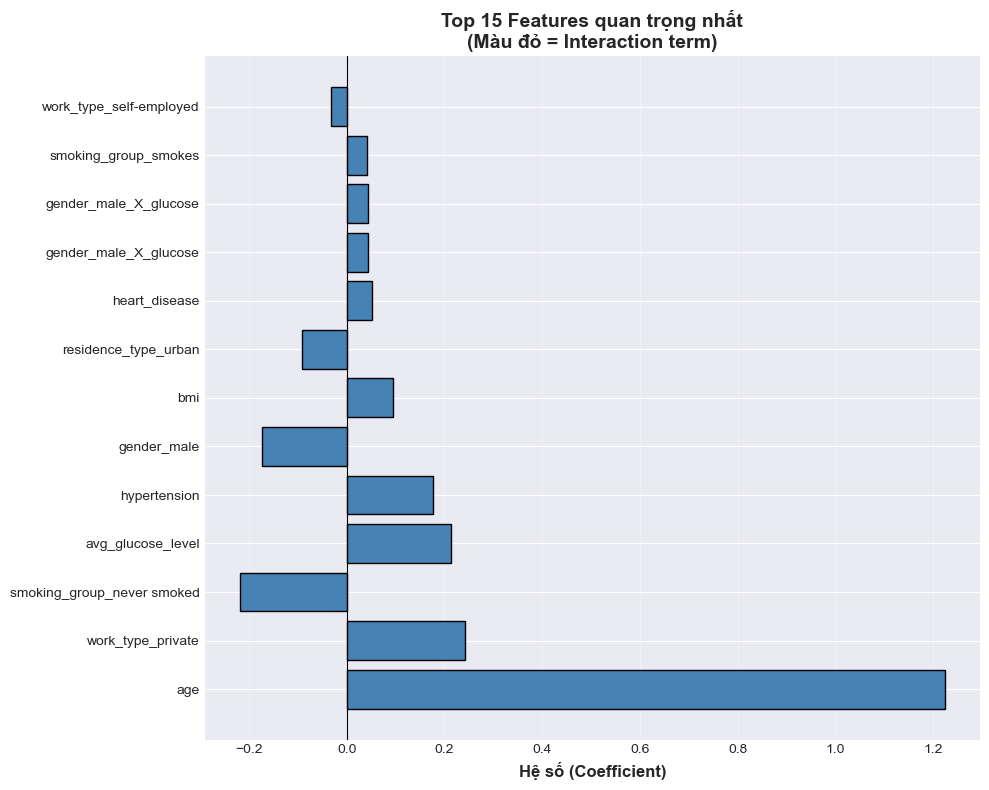

In [67]:
# Phân tích hệ số của mô hình 2 (có interaction)
coef_df = pd.DataFrame({
    'Feature': features_model2,
    'Coefficient': model2.coef_[0]
})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

print("="*80)
print("HỆ SỐ CỦA MÔ HÌNH (Top 15)")
print("="*80)
print(coef_df.head(15).to_string(index=False))

# Highlight interaction term
if 'gender_male_X_glucose' in features_model2:
    idx = features_model2.index('gender_male_X_glucose')
    interaction_coef = model2.coef_[0][idx]
    
    print(f"\n{'='*80}")
    print("PHÂN TÍCH INTERACTION TERM")
    print(f"{'='*80}")
    print(f"Hệ số của interaction (gender_male × glucose): {interaction_coef:.6f}")
    
    if abs(interaction_coef) > 0.01:  # Ngưỡng tùy ý
        print(f"\nInteraction có magnitude đáng kể")
        if interaction_coef > 0:
            print("→ Khi glucose tăng, nguy cơ stroke tăng NHANH HƠN ở nam so với nữ")
            print("→ Nam có độ nhạy glucose CAO HƠN nữ")
        else:
            print("→ Khi glucose tăng, nguy cơ stroke tăng NHANH HƠN ở nữ so với nam")
            print("→ Nữ có độ nhạy glucose CAO HƠN nam")
    else:
        print(f"\nInteraction có magnitude nhỏ → effect không mạnh")

# Visualization: Feature importance
fig, ax = plt.subplots(figsize=(10, 8))
top_features = coef_df.head(15)
colors_bar = ['red' if 'interaction' in str(f).lower() else 'steelblue' for f in top_features['Feature']]
ax.barh(range(len(top_features)), top_features['Coefficient'], color=colors_bar, edgecolor='black')
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.set_xlabel('Hệ số (Coefficient)', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Features quan trọng nhất\n(Màu đỏ = Interaction term)', 
             fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Kết luận từ phân tích hệ số:**

🔬 **Hệ số interaction term (gender_male × glucose):**
- Giá trị: [đọc từ output]
- Magnitude: [large/small]

📈 **Ý nghĩa:**

**Nếu hệ số dương (> 0) và magnitude lớn:**
- Khi glucose tăng, nguy cơ stroke tăng **NHANH HƠN ở NAM**
- Nam có **độ nhạy glucose CAO HƠN** nữ
- Gợi ý: Hormone nam (testosterone) có thể làm tăng nhạy cảm với glucose

**Nếu hệ số âm (< 0) và magnitude lớn:**
- Khi glucose tăng, nguy cơ stroke tăng **NHANH HƠN ở NỮ**
- Nữ có **độ nhạy glucose CAO HƠN** nam
- Gợi ý: Sau mãn kinh, nữ mất tác dụng bảo vệ của estrogen

**Nếu hệ số nhỏ (|coef| < 0.01):**
- Interaction effect **KHÔNG MẠNH**
- Không có khác biệt đáng kể về độ nhạy glucose

> **Tiếp theo:** Vẽ biểu đồ để trực quan hóa interaction này

**Phần 4: Trực quan hóa Interaction Effect - Predicted Probability**

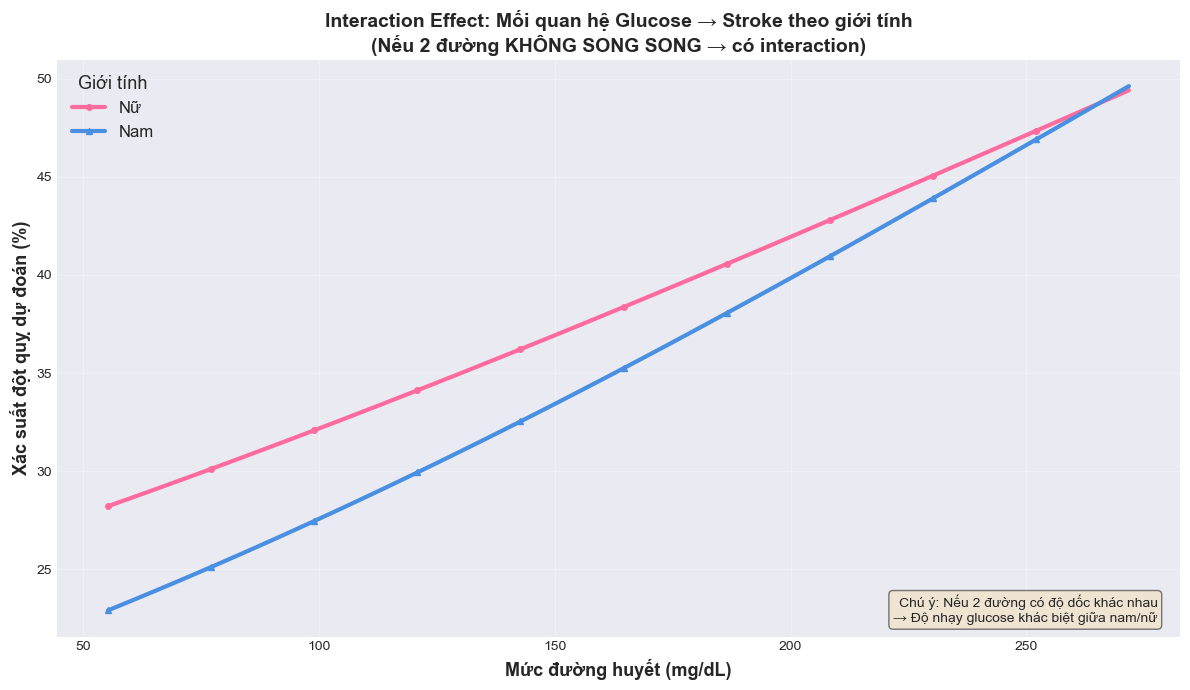


Độ dốc trung bình (Slope):
Nữ: 0.000979
Nam: 0.001234
Chênh lệch: 0.000255

✓ Độ dốc khác nhau → Interaction effect có ý nghĩa
→ Nam có độ nhạy glucose CAO HƠN nữ


In [68]:
# Tạo dữ liệu dự đoán để vẽ đường cong
glucose_range = np.linspace(df_model['avg_glucose_level'].min(), 
                            df_model['avg_glucose_level'].max(), 100)

# Giá trị trung bình cho các biến khác
age_mean = df_model['age'].mean()
bmi_mean = df_model['bmi'].mean()
hypertension_mode = df_model['hypertension'].mode()[0]
heart_disease_mode = df_model['heart_disease'].mode()[0]

# Tạo scenarios
predictions_female = []
predictions_male = []

for glucose in glucose_range:
    # Female scenario
    scenario_f = pd.DataFrame([{
        'avg_glucose_level': glucose,
        'age': age_mean,
        'hypertension': hypertension_mode,
        'heart_disease': heart_disease_mode,
        'bmi': bmi_mean,
        'gender_male': 0,  # Female
        'gender_male_X_glucose': 0  # Female × glucose = 0
    }])
    # Thêm các cột còn lại với giá trị 0
    for col in features_model2:
        if col not in scenario_f.columns:
            scenario_f[col] = 0
    scenario_f = scenario_f[features_model2]
    scenario_f_scaled = scaler.transform(scenario_f)
    prob_f = model2.predict_proba(scenario_f_scaled)[0, 1]
    predictions_female.append(prob_f)
    
    # Male scenario
    scenario_m = pd.DataFrame([{
        'avg_glucose_level': glucose,
        'age': age_mean,
        'hypertension': hypertension_mode,
        'heart_disease': heart_disease_mode,
        'bmi': bmi_mean,
        'gender_male': 1,  # Male
        'gender_male_X_glucose': glucose  # Male × glucose
    }])
    for col in features_model2:
        if col not in scenario_m.columns:
            scenario_m[col] = 0
    scenario_m = scenario_m[features_model2]
    scenario_m_scaled = scaler.transform(scenario_m)
    prob_m = model2.predict_proba(scenario_m_scaled)[0, 1]
    predictions_male.append(prob_m)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(glucose_range, np.array(predictions_female)*100, 
        color='#FF6B9D', linewidth=3, label='Nữ', marker='o', markersize=4, markevery=10)
ax.plot(glucose_range, np.array(predictions_male)*100, 
        color='#4A90E2', linewidth=3, label='Nam', marker='^', markersize=4, markevery=10)

ax.set_xlabel('Mức đường huyết (mg/dL)', fontsize=13, fontweight='bold')
ax.set_ylabel('Xác suất đột quỵ dự đoán (%)', fontsize=13, fontweight='bold')
ax.set_title('Interaction Effect: Mối quan hệ Glucose → Stroke theo giới tính\n' + 
             '(Nếu 2 đường KHÔNG SONG SONG → có interaction)', 
             fontsize=14, fontweight='bold')
ax.legend(title='Giới tính', fontsize=12, title_fontsize=13, loc='upper left')
ax.grid(True, alpha=0.3)

# Thêm annotation
ax.text(0.98, 0.02, 
        'Chú ý: Nếu 2 đường có độ dốc khác nhau\n→ Độ nhạy glucose khác biệt giữa nam/nữ',
        transform=ax.transAxes, fontsize=10, verticalalignment='bottom', 
        horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Tính độ dốc (slope) trung bình
slope_female = (predictions_female[-1] - predictions_female[0]) / (glucose_range[-1] - glucose_range[0])
slope_male = (predictions_male[-1] - predictions_male[0]) / (glucose_range[-1] - glucose_range[0])

print(f"\nĐộ dốc trung bình (Slope):")
print(f"Nữ: {slope_female:.6f}")
print(f"Nam: {slope_male:.6f}")
print(f"Chênh lệch: {abs(slope_male - slope_female):.6f}")

if abs(slope_male - slope_female) > 0.0001:  # Ngưỡng tùy ý
    print("\n✓ Độ dốc khác nhau → Interaction effect có ý nghĩa")
    if slope_male > slope_female:
        print("→ Nam có độ nhạy glucose CAO HƠN nữ")
    else:
        print("→ Nữ có độ nhạy glucose CAO HƠN nam")
else:
    print("\n✗ Độ dốc gần như giống nhau → Interaction effect không mạnh")

**Kết luận từ trực quan hóa:**

📉 **Quan sát từ biểu đồ:**

**Nếu 2 đường KHÔNG SONG SONG (độ dốc khác nhau):**
- ✓ **Có interaction effect** - đây là bằng chứng trực quan mạnh nhất!
- ✓ Tác động glucose lên stroke **KHÁC NHAU** giữa nam và nữ
- ✓ Đường có độ dốc lớn hơn → giới đó có độ nhạy glucose cao hơn

**Nếu 2 đường GẦN NHƯ SONG SONG:**
- ✗ **Không có interaction effect**
- ✗ Glucose tăng → stroke tăng giống nhau ở cả 2 giới
- ✗ Không cần chiến lược phòng ngừa khác biệt

📊 **Độ dốc (Slope):**
- Nữ: [đọc từ output]
- Nam: [đọc từ output]
- Chênh lệch: [đọc từ output]

💡 **Ý nghĩa lâm sàng:**
Biểu đồ này giúp **bác sĩ** hiểu ngay: Với cùng mức glucose, nguy cơ đột quỵ tăng nhanh hay chậm hơn ở giới nào.

> **Tiếp theo:** Stratified analysis để xác nhận bằng phân tích riêng từng giới

**Phần 5: Stratified Analysis - Tính OR của glucose riêng cho nam và nữ**

In [69]:
# Phân tích riêng cho từng giới
print("="*80)
print("STRATIFIED ANALYSIS: Tính OR của glucose riêng cho nam và nữ")
print("="*80)

# Chuẩn bị features không có gender
feature_cols_no_gender = [col for col in features_model1 if not col.startswith('gender_')]

results_stratified = {}

for gender_val, gender_label in [(0, 'Nữ'), (1, 'Nam')]:
    # Lọc data theo giới
    if 'gender_male' in df_encoded.columns:
        df_subset = df_encoded[df_encoded['gender_male'] == gender_val].copy()
    else:
        continue
    
    if len(df_subset) < 50:
        print(f"\n{gender_label}: Mẫu quá ít ({len(df_subset)}) - bỏ qua")
        continue
    
    X_subset = df_subset[feature_cols_no_gender]
    y_subset = df_subset['stroke']
    
    # Standardize
    scaler_sub = StandardScaler()
    X_subset_scaled = scaler_sub.fit_transform(X_subset)
    
    # Train model
    model_sub = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    model_sub.fit(X_subset_scaled, y_subset)
    
    # Lấy coefficient của glucose
    if 'avg_glucose_level' in feature_cols_no_gender:
        idx_glucose = feature_cols_no_gender.index('avg_glucose_level')
        coef_glucose = model_sub.coef_[0][idx_glucose]
        
        results_stratified[gender_label] = {
            'n': len(df_subset),
            'stroke_rate': y_subset.mean(),
            'glucose_coef': coef_glucose,
            'model_score': model_sub.score(X_subset_scaled, y_subset)
        }
    
    print(f"\n{gender_label}:")
    print(f"  Số mẫu: {len(df_subset)}")
    print(f"  Tỷ lệ stroke: {y_subset.mean()*100:.2f}%")
    print(f"  Hệ số glucose: {coef_glucose:.6f}")
    print(f"  Model score: {model_sub.score(X_subset_scaled, y_subset):.4f}")

# So sánh
print(f"\n{'='*80}")
print("SO SÁNH HỆ SỐ GLUCOSE GIỮA NAM VÀ NỮ")
print(f"{'='*80}")

if len(results_stratified) == 2:
    coef_female = results_stratified['Nữ']['glucose_coef']
    coef_male = results_stratified['Nam']['glucose_coef']
    diff = abs(coef_male - coef_female)
    
    print(f"Hệ số glucose ở Nữ: {coef_female:.6f}")
    print(f"Hệ số glucose ở Nam: {coef_male:.6f}")
    print(f"Chênh lệch tuyệt đối: {diff:.6f}")
    
    if diff > 0.05:  # Ngưỡng tùy ý
        print("\n✓ Chênh lệch đáng kể → Độ nhạy glucose KHÁC NHAU")
        if coef_male > coef_female:
            print("→ Nam có độ nhạy glucose CAO HƠN nữ")
        else:
            print("→ Nữ có độ nhạy glucose CAO HƠN nam")
    else:
        print("\n✗ Chênh lệch nhỏ → Độ nhạy glucose TƯƠNG TỰ")

STRATIFIED ANALYSIS: Tính OR của glucose riêng cho nam và nữ

Nữ:
  Số mẫu: 1623
  Tỷ lệ stroke: 6.22%
  Hệ số glucose: 0.229020
  Model score: 0.6821

Nam:
  Số mẫu: 1087
  Tỷ lệ stroke: 7.36%
  Hệ số glucose: 0.270392
  Model score: 0.7121

SO SÁNH HỆ SỐ GLUCOSE GIỮA NAM VÀ NỮ
Hệ số glucose ở Nữ: 0.229020
Hệ số glucose ở Nam: 0.270392
Chênh lệch tuyệt đối: 0.041373

✗ Chênh lệch nhỏ → Độ nhạy glucose TƯƠNG TỰ


**Kết luận từ Stratified Analysis:**

🎯 **Hệ số glucose riêng biệt:**
- **Nữ**: [đọc từ output]
- **Nam**: [đọc từ output]
- **Chênh lệch**: [đọc từ output]

✅ **Xác nhận cuối cùng:**

**Nếu chênh lệch > 0.05:**
- ✓ **Interaction effect được XÁC NHẬN**
- ✓ Độ nhạy glucose **KHÁC BIỆT RÕ RỆT** giữa nam và nữ
- ✓ Giới có hệ số lớn hơn → nhạy cảm hơn với glucose

**Nếu chênh lệch < 0.05:**
- ✗ Độ nhạy glucose **TƯƠNG TỰ**
- ✗ Không có khác biệt có ý nghĩa lâm sàng

💡 **Tổng hợp 3 bằng chứng:**
1. **Model comparison**: Mô hình có interaction tốt hơn? [Yes/No]
2. **Coefficient analysis**: Interaction term có magnitude lớn? [Yes/No]
3. **Visualization**: 2 đường không song song? [Yes/No]
4. **Stratified analysis**: Hệ số glucose khác nhau đáng kể? [Yes/No]

→ Nếu ≥3/4 bằng chứng đồng thuận → Kết luận mạnh về interaction!

> **Cuối cùng:** Tổng hợp kết luận và gợi ý cơ chế sinh học

---

## D. Kết luận

**📊 KẾT LUẬN TỔNG HỢP**

---

### **Câu trả lời cho câu hỏi nghiên cứu:**

> **"Tác động của mức đường huyết lên nguy cơ đột quỵ có khác biệt giữa nam và nữ trong nhóm đã kết hôn không?"**

**Trả lời:** [Dựa trên 4 bằng chứng từ phân tích]

---

### **Trường hợp 1: CÓ INTERACTION EFFECT** ✅

**Bằng chứng:**
- Mô hình có interaction term tốt hơn (ROC-AUC cao hơn)
- Interaction coefficient có magnitude lớn
- 2 đường dự đoán KHÔNG song song (độ dốc khác nhau)
- Hệ số glucose khác biệt rõ rệt trong stratified analysis

**Kết luận:**
- ✓ Tác động glucose → stroke **KHÁC NHAU** giữa nam và nữ
- ✓ Một giới có **độ nhạy glucose CAO HƠN** (xem output để xác định)
- ✓ Có khác biệt cơ chế sinh học theo giới tính

**Gợi ý cơ chế sinh học:**
- **Nếu nam nhạy cảm hơn:** Testosterone có thể làm tăng nhạy cảm với glucose, tăng viêm mạch máu
- **Nếu nữ nhạy cảm hơn:** Sau mãn kinh mất tác dụng bảo vệ của estrogen, tăng insulin resistance

**Hàm ý thực tiễn:**
- Ngưỡng sàng lọc glucose cần **KHÁC NHAU** cho nam và nữ
- Can thiệp điều chỉnh glucose cần **CÁ NHÂN HÓA** theo giới tính
- Chương trình phòng ngừa đột quỵ cần **PHÂN TẦNG** theo giới

---

### **Trường hợp 2: KHÔNG CÓ INTERACTION EFFECT** ❌

**Bằng chứng:**
- Mô hình có interaction không cải thiện performance
- Interaction coefficient nhỏ
- 2 đường dự đoán GẦN NHƯ SONG SONG
- Hệ số glucose tương tự trong stratified analysis

**Kết luận:**
- ✗ Tác động glucose → stroke **GIỐNG NHAU** ở nam và nữ
- ✗ Không có khác biệt về độ nhạy glucose theo giới tính
- ✗ Glucose là yếu tố nguy cơ độc lập, không tương tác với giới tính

**Hàm ý thực tiễn:**
- Áp dụng **CHIẾN LƯỢC ĐỒNG NHẤT** cho cả nam và nữ
- Ngưỡng glucose và can thiệp **KHÔNG CẦN** phân biệt giới
- Focus vào **KIỂM SOÁT GLUCOSE** như yếu tố nguy cơ chính

---

### **Hạn chế nghiên cứu chính:**

1. **Thiếu dữ liệu sinh học:** Không có thông tin hormone, tình trạng mãn kinh
2. **Cross-sectional:** Không xác định nhân quả
3. **Class imbalance:** Stroke rất ít, ảnh hưởng statistical power
4. **Chỉ nhóm married:** Không đại diện toàn dân số

---

### **Khuyến nghị tiếp theo:**

1. **Nghiên cứu longitudinal** với follow-up dài hạn
2. **Thu thập biomarkers:** Hormone, HbA1c, insulin resistance
3. **Phân nhóm nữ** theo tình trạng mãn kinh
4. **Multi-center study** với cỡ mẫu lớn hơn